# *Вклад различных факторов в изменение средней стоимости лечения*

Анализ изменение выручки медицинского центра в 2022 году относительно 2021 и выявление ключевых факторов, повлиявшие на это изменение

## Загрузка данных и ознакомление

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
#это что-то чтобы прочитался путь
from io import BytesIO
import requests

In [2]:
!pip install openpyxl;
try:
    data = pd.read_excel('D:\\Проекты\\dataset\\data_test_task_2022.xlsx')
except:
    spreadsheet_id = '1KYX4Rmj-6xivKRvct0N0UqmFw5pTQwTI'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
    r = requests.get(file_name)
    data = pd.read_excel(BytesIO(r.content))

data.head()

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   
3  30268157303   2021-01-24   
4  30268157403   2021-01-24   

                                        service_name  service_amount  \
0                                    Прием первичный            1470   
1  Взятие материала на посев, цитологическое иссл...             284   
2  Посев отдел, дыхательных путей - слизистая зев...            1134   
3      Общий анализ крови (лейкоцитарная форм,, СОЭ)             693   
4                                Ревматоидный фактор             420   

   service_number  insured  sex_id  age_for_service_date  
0               1   490777     2.0                    26  
1               1   490777     2.0                    26  
2               1   490777     2.0                    26  
3               1   490777     2.0                    26  
4               1   490777     2.0                    26

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


7 столбцов, данных не хватает только в sex_id, названия столбцов чистые

In [5]:
data.head()

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   
3  30268157303   2021-01-24   
4  30268157403   2021-01-24   

                                                                                     service_name  \
0                                                                                 Прием первичный   
1                        Взятие материала на посев, цитологическое исследование ( риноцитограмма)   
2  Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам   
3                                                   Общий анализ крови (лейкоцитарная форм,, СОЭ)   
4                                                                             Ревматоидный фактор   

   service_amount  service_number  insured  sex_id  age_for_service_date  
0            1470               1   490777    2.00                    26  
1             284               1   490777    2.00                    26  
2            1134               1   490777    2.00                    26  
3             693               1   490777    2.00                    26  
4             420               1   490777    2.00                    26

In [6]:
# для своего удобства табличка с названиями колонок
name = pd.DataFrame({'Поле':['record_id', 'service_date', 'service_name', 'service_number', 'service_amount', 'insured', 'sex_id', 'age_for_service_date'], 'Описание':['уникальный идентификатор строки данных', 'дата оказания медицинской услуги', 'наименование медицинской услуги','количество услуг', 'сумма выплат (стоимость оказанных услуг в рублях)','уникальный идентификатор пациента','пол пациента', 'возраст пациента']}).T
name

0  \
Поле                                   record_id   
Описание  уникальный идентификатор строки данных   

                                         1                                2  \
Поле                          service_date                     service_name   
Описание  дата оказания медицинской услуги  наименование медицинской услуги   

                         3                                                  4  \
Поле        service_number                                     service_amount   
Описание  количество услуг  сумма выплат (стоимость оказанных услуг в рублях)   

                                          5             6  \
Поле                                insured        sex_id   
Описание  уникальный идентификатор пациента  пол пациента   

                             7  
Поле      age_for_service_date  
Описание      возраст пациента

### Пропуски

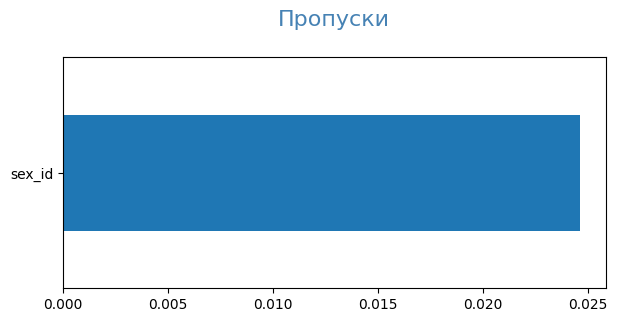

In [7]:
#Смотрим пропуски
def pass_value_barh(df):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (7,3), rot = 0, legend = False, fontsize = 10)
            .set_title('Пропуски' + "\n", fontsize = 16, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось или произошла ошибка в первой части функции ')
pass_value_barh(data)


Имеет место быть некоторое количество пропусков в графе - пол. 


### Пол

In [8]:
data.sex_id.value_counts()

2.00    52804
1.00    32544
Name: sex_id, dtype: int64

Один пол у нас встречается в 1.5 раза чаще, чем другой

### Наименование

In [9]:
data.service_name.nunique()

875

Уникальных значений в наименованиях услуг - 875 штук.

In [10]:
data.service_name.value_counts().to_frame().reset_index().sort_values(by='service_name').head()

index  service_name
874  Экспресс-определение лактазной недостаточности при ЭГДС             1
755                                   Mycoplasma hominis IgA             1
754                                Chlamydia trachomatis IgM             1
753                 Epstein Barr virus капсидный антиген IgG             1
752          Экспресс - скрининг гена стрептококка А в мазке             1

Данные по наименованию услуг весьма разнообразны и не очень чистные.

### Деньги

Распределение выручки


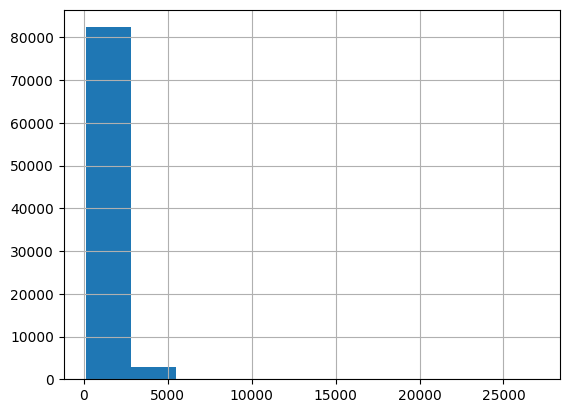

In [11]:
print('Распределение выручки')
data['service_amount'].hist();

Распределение выручки


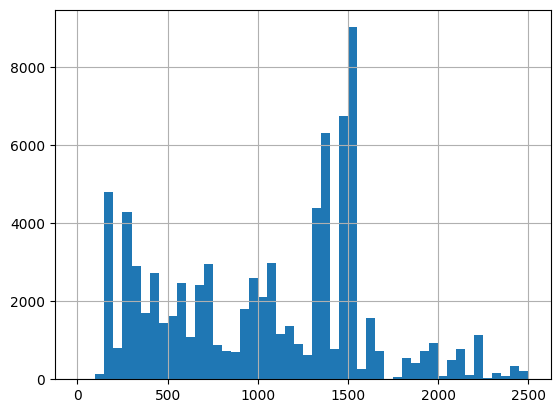

In [12]:
print('Распределение выручки')
data['service_amount'].hist(bins= 50, range=(0, 2500));

Видим выброс свыше 25000 уе, но так как один человек в один день мог оплатить несколько чеков, то выбросы имеет смысл смотреть в связке день-застрахованный. При ближайшем рассмотрение получается, что самые частые значения - это диапазон стоимость 1 услуги. В таком виде анализировать суммы бессмысленно.

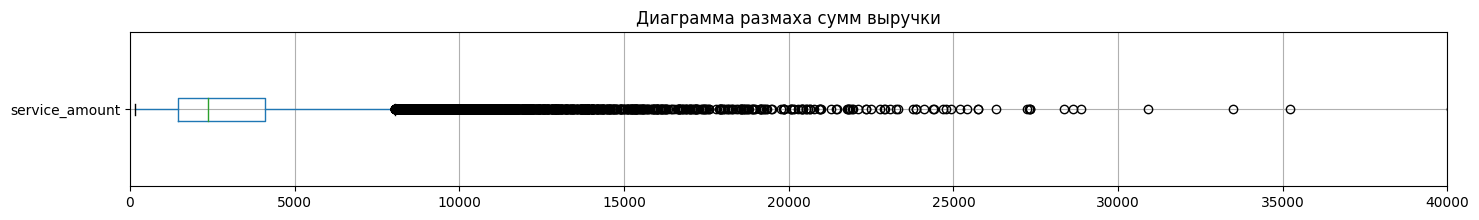

In [13]:
serv_sum = data.groupby(['service_date','insured'])['service_amount'].agg('sum').to_frame()
fig, ax = plt.subplots(figsize = (17,2))
ax = serv_sum.boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха сумм выручки')
ax.set_xlim(0, 40000);

Много выбросов - не хорошо.

In [14]:
serv_sum.reset_index().service_amount.describe()

count   30294.00
mean     3286.07
std      2756.53
min       158.00
25%      1470.00
50%      2373.00
75%      4096.00
max     47710.00
Name: service_amount, dtype: float64

Медиана в районе 2500 тысяч и 3300 среднее. Большое количество аномально больших значений.
Полагаю нет особого смысла вибирать тут аномалии, т.к. сумма услуг - это всегда большой разброс и каждый такой клиент имеет право быть тут. Надо просто учитывать этот факт при анализе.

### Возраст

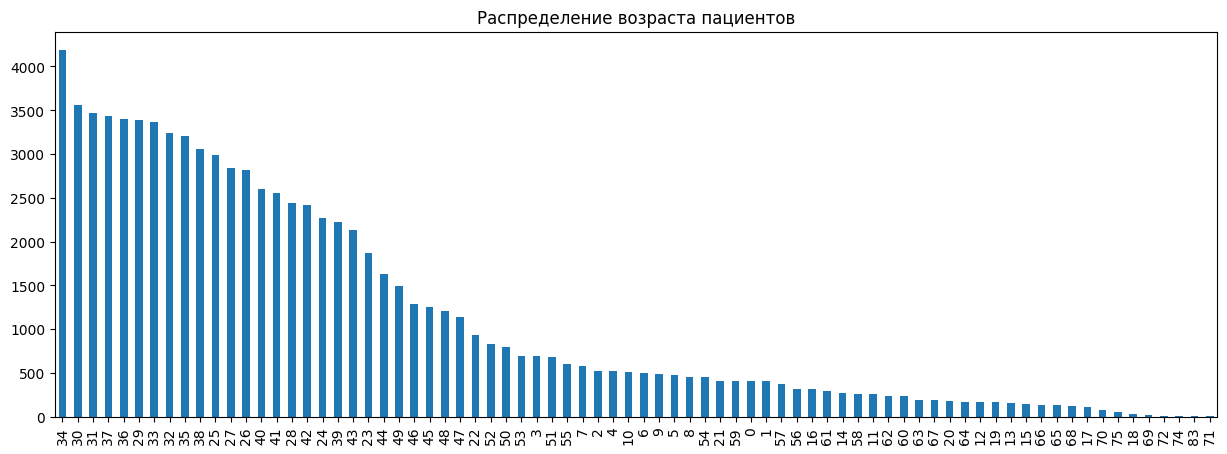

In [15]:
data.age_for_service_date.value_counts().plot(kind = 'bar', figsize = (15, 5), title='Распределение возраста пациентов');

Года у нас представлены от 0 до 83. При это самые частые клиенты от 29 до 38 лет. Медиана на 34 годах.

In [16]:
data.age_for_service_date.describe()

count   85369.00
mean       33.85
std        12.14
min         0.00
25%        27.00
50%        34.00
75%        41.00
max        83.00
Name: age_for_service_date, dtype: float64

Распределение возраста


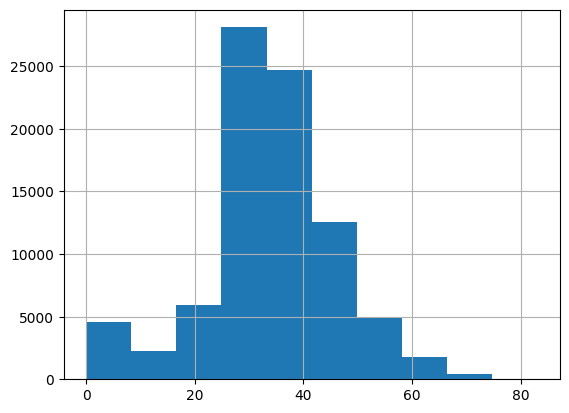

In [17]:
print('Распределение возраста')
data.age_for_service_date.hist();

In [18]:
data.loc[data.age_for_service_date>80]

record_id service_date     service_name  service_amount  \
3910  30347019403   2021-02-04  Прием первичный            1470   

      service_number  insured  sex_id  age_for_service_date  
3910               1   490933    1.00                    83

Пациентов старше 65 очень мало, а за 80 - уже скорее выброс. Пациент пришёл один раз на стандартный приём. Можно оставить, на данные не влияет.

### Количество услуг

In [19]:
data.service_number.value_counts()

1     83807
2      1373
3       135
4        26
5        10
13        5
7         4
12        2
14        2
16        2
6         1
11        1
15        1
Name: service_number, dtype: int64

Услуги в основном регистрировались по одной штуке на запись.

In [20]:
data.loc[data['service_number']>=10]

record_id service_date                                  service_name  \
9050   30620900003   2021-04-03  Постановка кожных аллергопроб (за 1 единицу)   
12519  30786052903   2021-05-01  Постановка кожных аллергопроб (за 1 единицу)   
12618  30786062803   2021-05-15  Постановка кожных аллергопроб (за 1 единицу)   
14404  30786241403   2021-05-15  Постановка кожных аллергопроб (за 1 единицу)   
36313  31680597403   2021-11-20  Постановка кожных аллергопроб (за 1 единицу)   
37567  31680727103   2021-11-25  Постановка кожных аллергопроб (за 1 единицу)   
48871  32112436003   2022-02-05  Постановка кожных аллергопроб (за 1 единицу)   
58060  32327252803   2022-03-24  Постановка кожных аллергопроб (за 1 единицу)   
63295  32511089303   2022-04-30  Постановка кожных аллергопроб (за 1 единицу)   
69049  32631559703   2022-05-05  Постановка кожных аллергопроб (за 1 единицу)   
72775  32800999303   2022-06-17  Постановка кожных аллергопроб (за 1 единицу)   
73042  32801029203   2022-06-25  Постановка кожных аллергопроб (за 1 единицу)   
83447  33177812903   2022-08-25  Постановка кожных аллергопроб (за 1 единицу)   

       service_amount  service_number  insured  sex_id  age_for_service_date  
9050             2772              12   512453    1.00                    29  
12519            2541              11   512572    2.00                    35  
12618            3003              13   363075    2.00                    34  
14404            3003              13   596505    1.00                    33  
36313            3840              16   544906    1.00                    31  
37567            3840              16   734530    2.00                    43  
48871            3600              15   698543    2.00                    36  
58060            3120              13   611837    2.00                    50  
63295            3120              13   873314    2.00                    37  
69049            3120              13   194239    1.00                    42  
72775            2880              12   651900    2.00                    27  
73042            3360              14  1155151    2.00                    39  
83447            3640              14  1306792    2.00                    27

Никаких аномалий тут не выявлено, для нормальной обработки цен имеет смысл сделать столбец с ценой за 1 услугу, т.к. в большинстве счета выставлялись за одну услугу, мы опять приходим к необходимости оценки показателей в связке клиент-день.

### Дата

In [21]:
 data.service_date.min()

'2021-01-03'

In [22]:
 data.service_date.max()

'2022-08-31'

Данные предоставлены с 1 марта 2021 года по 31 августа 2022 года


## Предобработка данных

- Заменить тип данных на date  в srvice_date
- Заменить в sex_id данные на читаемые
- Убрать данные с пропусками в sex_id
- Убрать в названиях пропуски и ошибки
- Удалить дубликаты
- Добавить столбцы: первый день, последний день, цена за услугу и возрастная группа


### Корректировка данных

In [23]:
#Заменить в sex_id данные на читаемые
def sex(sex):
    try:
        if sex == 1:
            return 'мужчины'
        elif sex == 2: 
            return 'женщины'
        else:
            return '0'
    except:
        pass

In [24]:
data.sex_id=data.sex_id.apply(sex) 

In [25]:
data.sex_id.value_counts()

женщины    52804
мужчины    32544
0             21
Name: sex_id, dtype: int64

In [26]:
#Убираем данные без инфромации о поле пациента
data = data.drop(data[data['sex_id']=='0'].index)

In [27]:
#Строчки наименований делаем красивыми
def space(col):
    return (col.replace(',','')
               .replace('.','')
               .replace('(офтальмоскопия)','')
               .replace('4смкв', '4 квсм')
               .replace('трапевт', 'терапевт')
               .strip(' '))

In [28]:
data.service_name=data.service_name.apply(space)

In [29]:
data.service_name=data.service_name.str.lower()

In [30]:
#контрольное значение
data.service_name.nunique()

864

In [31]:
#Заменить тип данных на date  в srvice_date
data.service_date=pd.to_datetime(data['service_date'])

In [32]:
def appoint(col):
    for name in col:
        if 'первичный' in col:
            return 'первичный приём'
        elif 'повторный' in col:
            return 'повторный приём'
        else:
            return col

In [33]:
data['service_name']=data['service_name'].apply(appoint)

### Удаление дубликатов

In [34]:
data.duplicated().sum()

0

In [35]:
 data.duplicated (['service_date', 'service_amount', 'insured', 'service_name']).sum() 

3405

на дроп по индексу: 25987, 864, 4245, 53995, 23243 - как дублирующие записи, подтвердить дублирование у остальных не представляется возможным

In [36]:
data[data.duplicated (['service_date', 'service_amount', 'insured', 'service_name'], keep=False)].sort_values(by='insured').head(10)

record_id service_date     service_name  service_amount  \
28850  31408907903   2021-09-21  первичный приём            1470   
28849  31408907803   2021-09-21  первичный приём            1470   
8293   30620824103   2021-04-23  первичный приём            1470   
8284   30620823203   2021-04-23  первичный приём            1470   
13180  30786119003   2021-05-03  первичный приём            1470   
13179  30786118903   2021-05-03  первичный приём            1470   
61226  32510879903   2022-04-04  первичный приём            1540   
61224  32510879703   2022-04-04  первичный приём            1540   
61230  32510880303   2022-04-04  первичный приём            1540   
2253   30346815703   2021-02-27  первичный приём            1470   

       service_number  insured   sex_id  age_for_service_date  
28850               1   125073  женщины                    66  
28849               1   125073  женщины                    66  
8293                1   139539  женщины                    42  
8284                1   139539  женщины                    42  
13180               1   142447  мужчины                    24  
13179               1   142447  мужчины                    24  
61226               1   142488  женщины                    44  
61224               1   142488  женщины                    44  
61230               1   142488  женщины                    44  
2253                1   142690  женщины                    58

In [37]:
#Убираем дубликаты
data=data.drop(index=[25987, 864, 4245, 53995, 23243])


### Добавление столбцов

In [38]:
#Добавление столбца "Цена", т.к. по некоторым услугам указана сумма за коммплекс услуг
data['price'] = data['service_amount']/data['service_number']

In [39]:
# Добавление столбцов с датой первого и последнего обращений 
profiles=(data.sort_values(by=['insured', 'service_date'])
          .groupby('insured')
          .agg({'service_date':['first', 'last']})
          .reset_index()
        )
profiles.columns=['insured','first_dt', 'last_dt']
profiles.head()

insured   first_dt    last_dt
0      125073 2021-01-11 2021-11-28
1      125094 2021-01-22 2022-04-13
2      125404 2021-08-04 2021-08-04
3      139315 2021-12-28 2021-12-28
4      139539 2021-04-15 2021-05-31
5      142427 2021-01-03 2021-02-05
6      142432 2021-01-22 2021-01-22
7      142438 2021-01-16 2022-01-18
8      142447 2021-01-05 2022-03-16
9      142451 2022-03-29 2022-03-30
10     142488 2021-04-11 2022-04-06
11     142496 2022-03-02 2022-05-24
12     142513 2022-01-17 2022-01-17
13     142530 2021-01-13 2022-03-30
14     142562 2021-01-03 2021-01-06
15     142587 2021-01-19 2021-05-20
16     142597 2021-01-25 2021-01-29
17     142690 2021-02-27 2021-04-01
18     142773 2022-01-23 2022-01-23
19     142901 2021-01-12 2021-01-15
20     146160 2021-10-02 2021-10-05
21     146542 2021-02-25 2021-04-21
22     147008 2021-02-18 2021-03-03
23     150261 2021-04-26 2021-06-15
24     152173 2021-01-22 2021-01-22
25     152876 2021-01-28 2021-08-31
26     154938 2021-12-24 2022-07-20
27     156704 2021-12-19 2021-12-20
28     156716 2021-03-10 2021-03-18
29     156718 2021-05-03 2022-07-28
30     156785 2021-10-10 2021-11-09
31     156857 2021-10-12 2021-10-26
32     157593 2021-11-03 2022-03-28
33     157632 2021-02-27 2021-05-07
34     157830 2021-06-04 2022-02-05
35     158643 2021-04-25 2022-02-14
36     159017 2021-06-23 2021-06-23
37     159101 2021-12-15 2021-12-15
38     159655 2021-02-15 2021-02-15
39     159948 2021-01-26 2021-01-30
40     159950 2021-01-07 2021-01-17
41     159953 2021-01-16 2021-01-30
42     159960 2021-01-08 2021-01-27
43     159967 2022-02-26 2022-03-05
44     159969 2021-07-16 2022-01-21
45     159970 2021-01-31 2021-01-31
46     159971 2021-01-21 2021-07-17
47     159982 2021-10-11 2021-10-15
48     159996 2021-05-06 2022-04-16
49     159997 2021-02-13 2022-06-01
50     159998 2021-01-05 2022-05-30
51     160000 2022-02-15 2022-02-15
52     160029 2021-04-11 2021-07-25
53     160038 2021-05-28 2021-11-11
54     160042 2021-01-12 2021-11-03
55     160055 2021-08-08 2021-08-08
56     160064 2021-01-09 2021-09-15
57     160072 2021-02-06 2022-03-13
58     160115 2021-01-06 2021-02-26
59     160122 2021-01-15 2021-01-15
60     160130 2021-03-21 2021-04-04
61     160131 2021-03-04 2021-03-12
62     160137 2021-02-02 2021-02-14
63     160140 2021-01-16 2022-03-12
64     160149 2021-01-30 2022-05-11
65     160150 2021-01-28 2022-04-26
66     160739 2021-01-05 2021-01-10
67     160960 2022-03-05 2022-03-05
68     161168 2021-07-27 2021-08-19
69     161476 2021-04-06 2021-05-04
70     161654 2021-01-06 2022-05-25
71     161704 2021-11-30 2022-02-25
72     161917 2021-01-26 2021-01-29
73     162131 2021-02-12 2021-02-12
74     163190 2021-01-20 2021-01-20
75     163202 2021-01-18 2021-01-20
76     163219 2022-07-02 2022-07-02
77     163220 2022-07-02 2022-07-02
78     163826 2021-04-28 2021-04-28
79     164401 2021-02-14 2021-02-14
80     164691 2021-09-25 2021-12-07
81     164853 2021-03-06 2021-04-28
82     164861 2021-05-08 2021-05-08
83     165005 2021-01-29 2021-01-29
84     165277 2021-11-08 2021-11-11
85     165644 2021-06-07 2021-09-24
86     166112 2021-01-18 2021-02-06
87     166114 2021-01-07 2022-07-06
88     166118 2021-01-22 2021-01-22
89     166119 2021-01-30 2021-01-30
90     166120 2021-01-21 2021-01-21
91     166121 2021-01-23 2021-02-02
92     166206 2021-01-08 2021-01-08
93     166291 2022-02-15 2022-07-19
94     166394 2021-03-29 2021-03-31
95     166409 2021-03-26 2021-05-29
96     166436 2021-01-05 2021-05-19
97     167152 2021-08-07 2021-08-11
98     167652 2021-01-15 2021-01-15
99     167653 2021-03-13 2021-03-13
100    167701 2021-01-17 2022-01-17
101    167798 2021-01-15 2021-01-17
102    167896 2021-01-13 2021-01-28
103    168236 2021-01-21 2021-04-12
104    168558 2022-01-29 2022-01-29
105    168802 2021-01-20 2021-01-27
106    168829 2021-06-07 2021-08-05
107    168909 2021-01-13 2021-01-20
108    169070 2021-01-07 2021-01-21
109    170063 2021-06-04 2022-03-27
110    170

In [40]:
data = data.merge(profiles[['insured', 'first_dt', 'last_dt']], on='insured', how='left')

In [41]:
#добавление столбца с месяцем и годом
data['month'] = data['service_date'].astype('datetime64[M]')

In [42]:
#date_insured['month'] = date_insured['month'].dt.date

добавления столбцов: минимальная цена, максимальная цена, разница - для анализа изменения цены

In [43]:
for n in data['service_name'].unique():
    data.loc[(data['service_name']==n),'min'] = data.loc[(data['service_name']==n), 'price'].min()

In [44]:
for n in data['service_name'].unique():
    data.loc[(data['service_name']==n),'max'] = data.loc[(data['service_name']==n), 'price'].max()

In [45]:
data['dif'] = round((data['max'] - data['min'])*100/data['min'], 2)

In [46]:
#Номинальный столбец для расчёта удержания
def pay(col):
    if col > 0.00:
        return True
    else: 
        return False

In [47]:
data['payer'] = data['service_amount'].apply(pay)

In [48]:
def age(col):
    try:
        if col == 0:
            return 'младенцы'
        elif 1 <= col <= 11:
            return 'дети'
        elif 12 <= col < 18:
            return 'подростки'
        elif 18 <= col <= 40:
            return 'молодёжь'
        elif 40 < col <= 60:
            return 'взрослые'
        elif col >= 60:
            return 'пожилые'
    except:
        pass

In [49]:
data['age_group']= data['age_for_service_date'].apply(age)

### Допы

In [50]:
#Для понимания "популярности" услуги. Данные предоставленны за 605 дней.
max_date =  data.service_date.max()
min_date =  data.service_date.min()
days_num = (max_date - min_date).days
days_num

605

In [51]:
#Обнаруженный во время анализа выброс, данные ошибочны
data.loc[(data['service_name']=='общий анализ крови (лейкоцитарная форм соэ)') & (data['service_amount']==1800)]

record_id service_date                                 service_name  \
70488  32631707403   2022-05-10  общий анализ крови (лейкоцитарная форм соэ)   

       service_amount  service_number  insured   sex_id  age_for_service_date  \
70488            1800               1  1072935  мужчины                    34   

        price   first_dt    last_dt      month    min     max    dif  payer  \
70488 1800.00 2022-05-06 2022-05-10 2022-05-01 693.00 1800.00 159.74   True   

      age_group  
70488  молодёжь

In [52]:
data=data.drop(data[data['record_id']==32631707403].index)

In [53]:
#data.to_csv('C:/Users/ksana/data_1.csv', index=False)

## Анализ данных

### Гипотезы: 
 1. Резкое падение прибыли после апреля 2022 года связано с оттоком обратившихся, что является следствием увеличением стоимости услуг(частично).
 2. У клиники плохое удержание в последнее время (нет и это не важно);
 3. Количество обращений в клинику зависит от пола и возраста(да).

### Суммы

In [54]:
data.service_amount.sum()

99521070

Оборот клиники за 20 месяцев составил 99,5 миллионов рублей, это около 5 миллионов в кассе ежемесячно. 

Смотрим распределение.

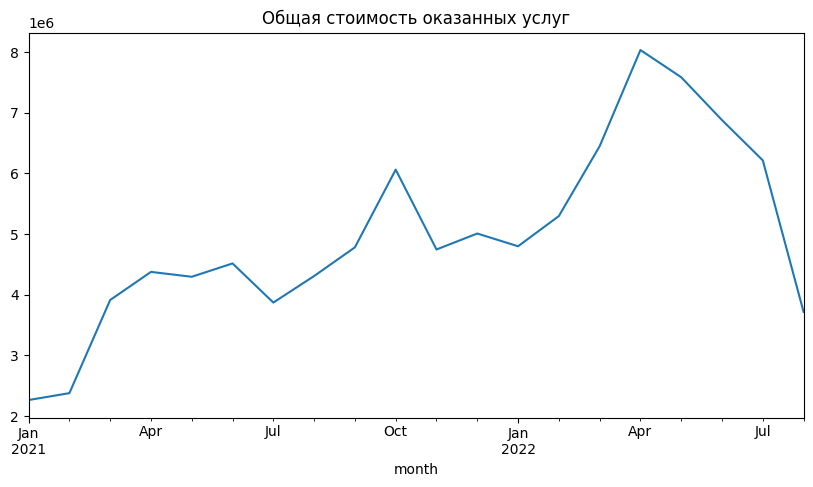

In [55]:
data.groupby(['month']).agg({'service_amount':'sum'}).plot(kind='line', figsize = (10,5), title='Общая стоимость оказанных услуг', legend=False);

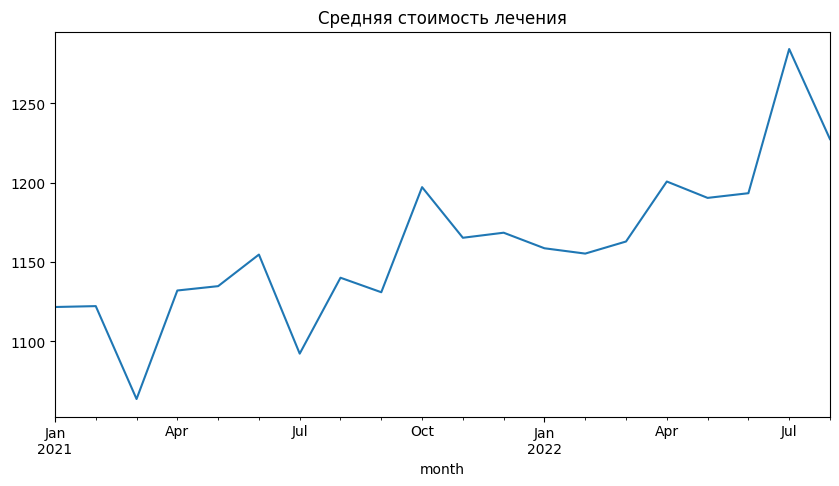

In [56]:
data.groupby(['month']).agg({'service_amount':'mean'}).plot(kind='line', figsize = (10,5), title='Средняя стоимость лечения', legend=False);

Как видно по первому же график сумма предоставленных услуг растёт от месяца к месяцу и падает после июля 2022 года с пиками в октябрые 2011 и марте 2022 г.


Важно понять связано ли это с изменением количества клиентов, изменением количества визитов клиентов или ростом цены на услуги. И как эти изменения связаны с данными о самих пациентах.

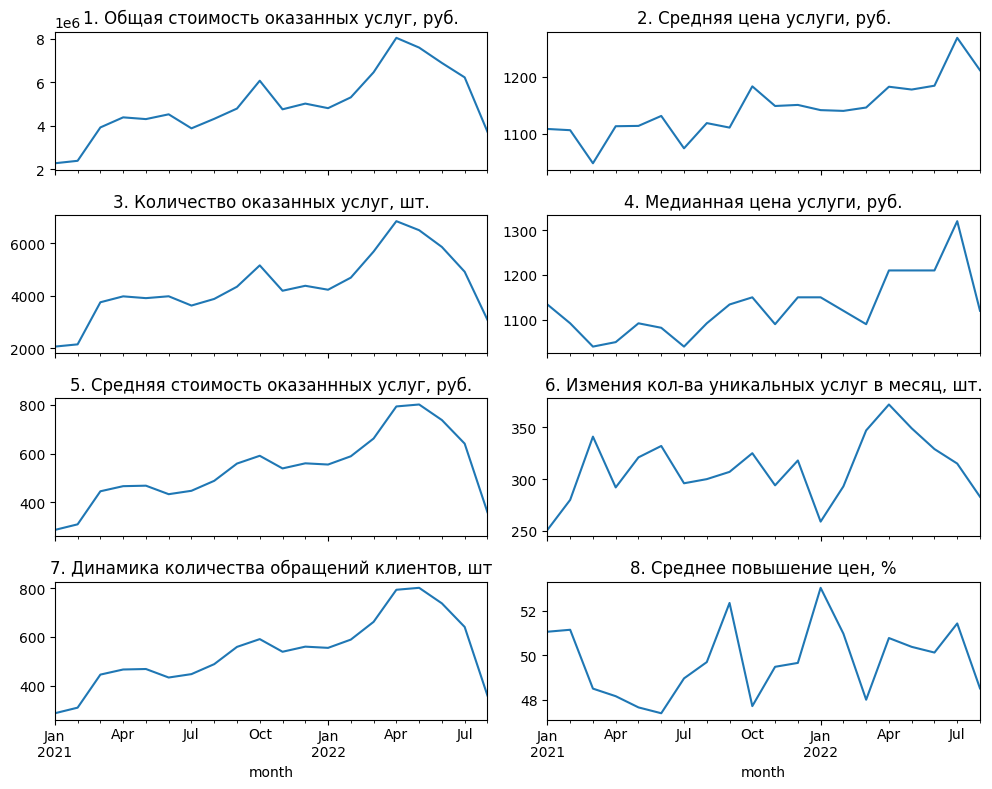

In [57]:
plt.figure(figsize=(10, 8)) 

ax1 = plt.subplot(4, 2, 1)
(data.groupby(['month']).agg({'service_amount':'sum'})
    .plot(kind='line', title='1. Общая стоимость оказанных услуг, руб.', legend=False, ax=ax1))  

ax2 = plt.subplot(4, 2, 2, sharex = ax1)
(data.groupby(['month']).agg({'price':'mean'})
     .plot(kind='line', title='2. Средняя цена услуги, руб.', legend=False, ax=ax2))

ax3=plt.subplot(4, 2, 3, sharex = ax1)
(data.groupby(['month']).agg({'service_number':'sum'})
    .plot(kind='line', title='3. Количество оказанных услуг, шт.', legend=False, ax=ax3))


ax4 = plt.subplot(4, 2, 4, sharex = ax1)
(data.groupby(['month']).agg({'price':'median'})
     .plot(kind='line', title='4. Медианная цена услуги, руб.', legend=False, ax=ax4))

ax5=plt.subplot(4, 2, 5, sharex= ax1)
(data.groupby(['month']).agg({'insured':'nunique'})
.plot(kind='line', title='5. Средняя стоимость оказаннных услуг, руб.', legend=False, ax=ax5));



ax6=plt.subplot(4, 2, 6, sharex= ax1)
(data.groupby(['month']).agg({'service_name':'nunique'})
    .plot(kind='line', title='6. Измения кол-ва уникальных услуг в месяц, шт.', legend=False, ax=ax6));

ax7=plt.subplot(4, 2, 7, sharex= ax1)
(data.groupby(['month']).agg({'insured':'nunique'})
    .plot(kind='line', title='7. Динамика количества обращений клиентов, шт', legend=False, ax=ax7));

ax8=plt.subplot(4, 2, 8, sharex= ax1)
(data.groupby(['month']).agg({'dif':'mean'})
    .plot(kind='line', title='8. Среднее повышение цен, %', legend=False, ax=ax8));


plt.tight_layout()
plt.show()

Наблюдаем пики на левых графиках в марте 2021 года, октябре 2021 года, апрель и май 2022 года:

- Первый пик - март 2021 г.- увеличения кол-ва обращений, оказано __много услуг__ по средней цене.
- Второй пик - октябрь 2021 г.- увеличение средней стоимости услуг по сравнению с медианной, __увеличение количества дорогих услуг__, увеличение количества клиентов, незначительное повышение количества услуг.
- Третий пик - апрель 2022 г. - __увеличение кол-ва обратившихся__, резкое увеличение медианной цены на услуги(в списке услуг появились более дорогие).
- В июле тоже были хорошие показатели оборота за счёт __оказания более дорогих услуг__.




Так же интересны провалы в ноябре 2021 и январе 2022 г. и июле 2022 г.:
количество обратившихся слегка просело и при этом резко снизилось количество оказанных услуг, возможно это связано с _увеличением цен на услуги_. Что _частично_ подтверждает гипотезу о влиянии изменения цен на оборот. Т.е. зависимость есть, но она не так сильна, как я предположила, решающую роль тут оказали иные факторы.

В июле 2022 г. резкое снижение кассы стало результатом нескольких факторов: количество услуг на человека упало, услуги подешевели (средняя стоимость), упало количество обратившихся.

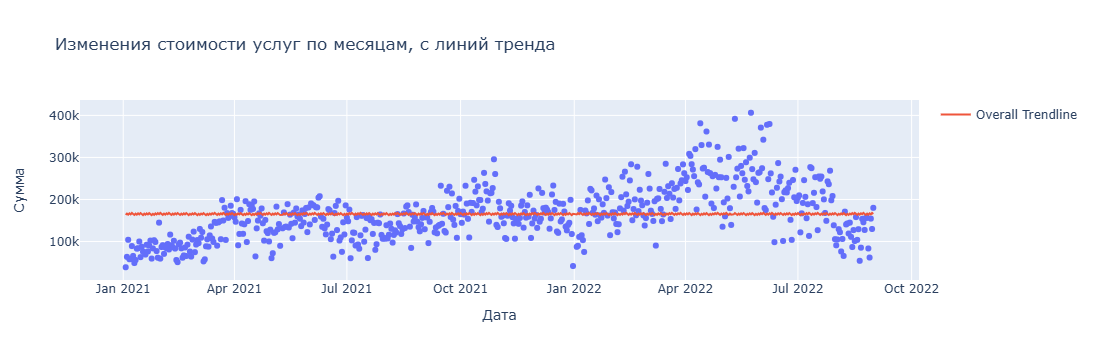

In [58]:
trend=data.groupby('service_date').agg({'service_amount':'sum'}).reset_index()
trend.columns = ['Дата','Сумма']
px.scatter(trend, x='Дата', y='Сумма', trendline="ols", trendline_scope="overall",
                title= 'Изменения стоимости услуг по месяцам, с линий тренда')

Все вышеперечисленные изменения оказывают минимально положительное влияние на тренд

###  Услуги

In [59]:
data['month']=data['month'].dt.date

In [60]:
serv=data.pivot_table(index='service_name', columns='month', values='record_id', aggfunc='count')#.reset_index()
serv['all']=serv.sum(axis=1)
serv= serv.sort_values(by='all', ascending=False).head(20)
serv=serv.drop(columns='all')

In [61]:
print('Таблица количества оказанных услуг по месяцам, Топ-20 ')
serv

Таблица количества оказанных услуг по месяцам, Топ-20 


month                                                                 2021-01-01  \
service_name                                                                       
первичный приём                                                           380.00   
повторный приём                                                           245.00   
взятие крови из периферической вены                                        92.00   
общий анализ крови (лейкоцитарная форм соэ)                                74.00   
магнитотерапия (1 сеанс)                                                   60.00   
взятие мазка                                                               41.00   
общий анализ мочи                                                          42.00   
лазеротерапия (1 сеанс)                                                     2.00   
интерференционные токи (1 сеанс) (4 поля)                                  26.00   
гинекологический мазок                                                     38.00   
рефрактометрия                                                             26.00   
интерпретация экг с описанием                                              19.00   
снятие экг (без интерпретации и описания)                                  18.00   
ультразвуковое исследование гинекология трансвагинально с дс сосудов       20.00   
сеанс рефлексотерапии                                                      42.00   
ттг (тиреотропин)                                                          20.00   
глюкоза крови                                                              15.00   
алт (аланинаминотрансфераза)                                               11.00   
аст (аспартатаминотрансфераза)                                             11.00   
комплексная мануальная терапия                                             16.00   

month                                                                 2021-02-01  \
service_name                                                                       
первичный приём                                                           380.00   
повторный приём                                                           298.00   
взятие крови из периферической вены                                       109.00   
общий анализ крови (лейкоцитарная форм соэ)                                90.00   
магнитотерапия (1 сеанс)                                                   84.00   
взятие мазка                                                               31.00   
общий анализ мочи                                                           3.00   
лазеротерапия (1 сеанс)                                                    20.00   
интерференционные токи (1 сеанс) (4 поля)                                  25.00   
гинекологический мазок                                                     31.00   
рефрактометрия                                                             18.00   
интерпретация экг с описанием                                              28.00   
снятие экг (без интерпретации и описания)                                  27.00   
ультразвуковое исследование гинекология трансвагинально с дс сосудов       22.00   
сеанс рефлексотерапии                                                      23.00   
ттг (тиреотропин)                                                          22.00   
глюкоза крови                                                              21.00   
алт (аланинаминотрансфераза)                                               14.00   
аст (аспартатаминотрансфераза)                                             14.00   
комплексная мануальная терапия                                             10.00   

month                                                                 2021-03-01  \
service_name                                                                       
первичный приём                                                           643.00   
повторный приём                                   

Тут хорошо иллюстрируется пик октября 2021 года, когда количество более дорогих уходовых услуг резко выросло. 

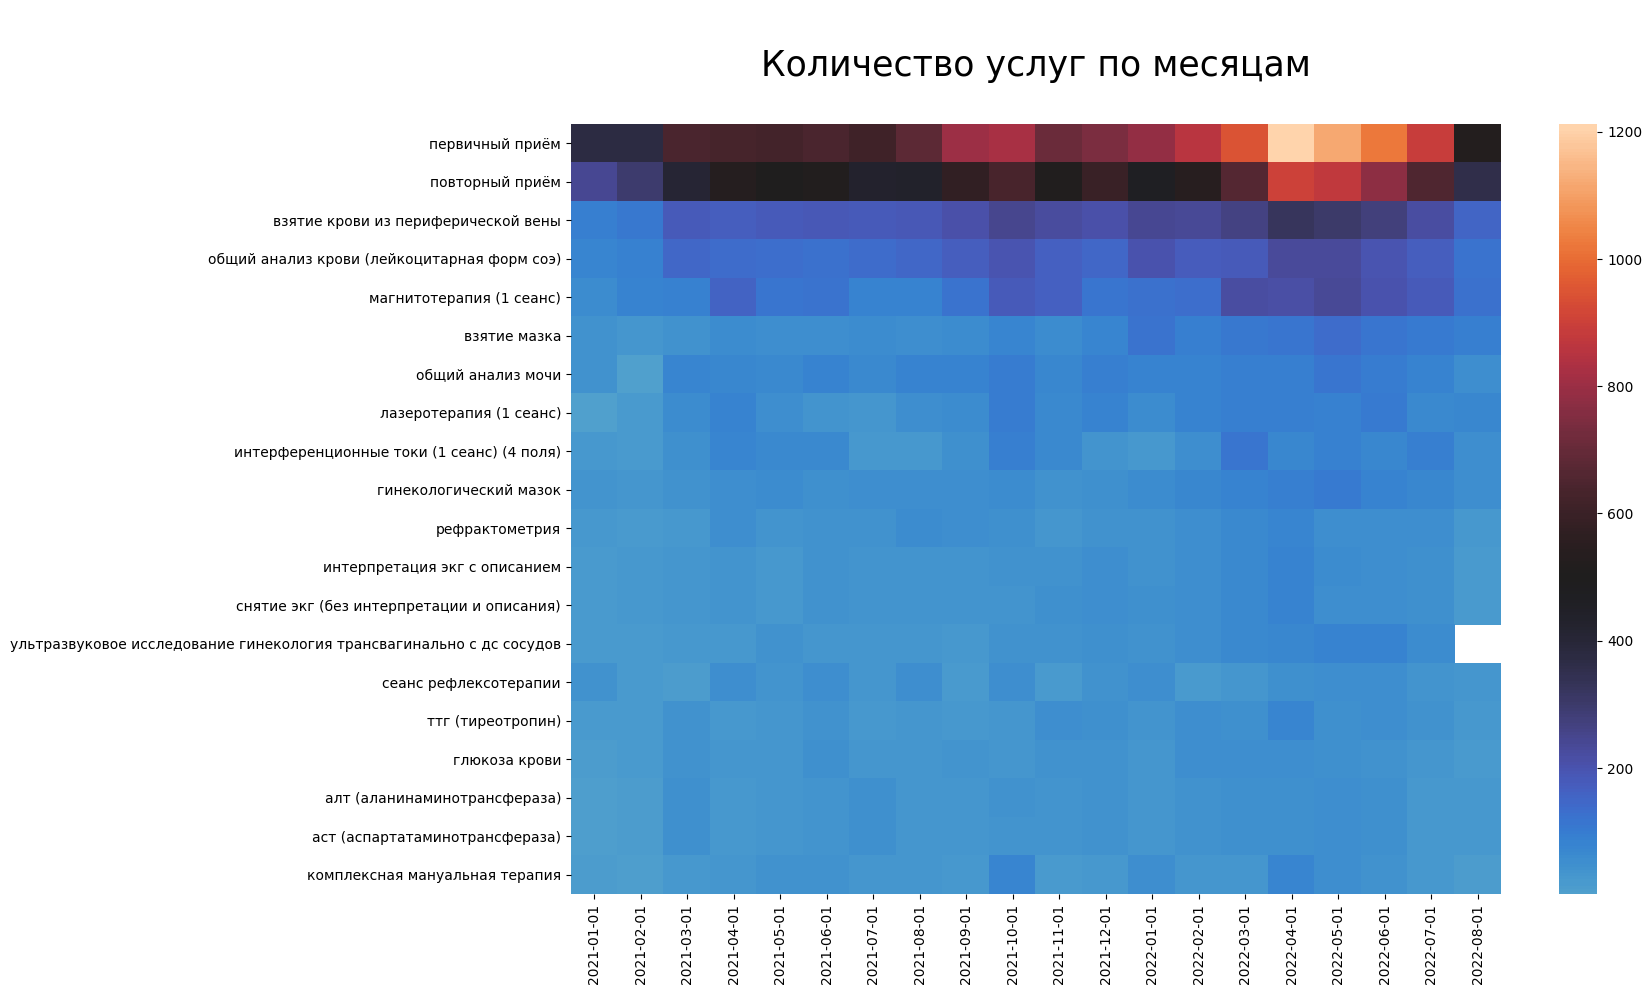

In [62]:
plt.figure(figsize=(15, 10))
sns.heatmap(serv, center= 500)
plt.title('\nКоличество услуг по месяцам\n', fontsize=25)
plt.xlabel('', fontsize=20)
plt.ylabel('',fontsize=20)
plt.show()

Апрель и май 2022 г - лидеры по количеству оказанных услуг. 

Хорошо просматривается неизменный Топ-5 услуг на протяжение всего периода.
И тёмным стобликов по середине - октябрь 2021, а комплексная мануальная терапия в купе с лазеротерапией и рефлексотерапией - прям тащат оборот.

Судя по распределению услуг в апреле 2022 - месяца с самой большой выручкой и привлечением - большая группа пациентов прибыла для общей оценки состояния здоровья.

### Цены

In [63]:
serv_cnt = data.service_name.value_counts().to_frame().reset_index()
serv_cnt.columns = ['service_name', 'cnt']

In [64]:
serv_dif = pd.pivot_table(data, index = 'service_name', values = 'dif', aggfunc='mean').sort_values(by = 'dif', ascending = False).reset_index()
serv_dif.columns = ['service_name', 'dif']

In [65]:
serv_cnt = serv_cnt.merge(serv_dif, on ='service_name', how = 'left')

In [66]:
print('Таблица самых популярных услуг клиники и разница цен в процентах')
serv_cnt = serv_cnt.sort_values(by = 'cnt', ascending = False)
serv_cnt_pop = serv_cnt.loc[serv_cnt['cnt']>605]
serv_cnt_pop.columns = ['Наименование усглуги','Кол-во', 'Разница']
serv_cnt_pop

Таблица самых популярных услуг клиники и разница цен в процентах


Наименование усглуги  \
0                                                        первичный приём   
1                                                        повторный приём   
2                                    взятие крови из периферической вены   
3                            общий анализ крови (лейкоцитарная форм соэ)   
4                                               магнитотерапия (1 сеанс)   
5                                                           взятие мазка   
6                                                      общий анализ мочи   
7                                                лазеротерапия (1 сеанс)   
8                              интерференционные токи (1 сеанс) (4 поля)   
9                                                 гинекологический мазок   
10                                                        рефрактометрия   
11                                         интерпретация экг с описанием   
12                             снятие экг (без интерпретации и описания)   
13  ультразвуковое исследование гинекология трансвагинально с дс сосудов   
14                                                 сеанс рефлексотерапии   
15                                                     ттг (тиреотропин)   
16                                                         глюкоза крови   
17                                          алт (аланинаминотрансфераза)   
18                                        аст (аспартатаминотрансфераза)   
19                                        комплексная мануальная терапия   
20                              исследование глазного дна щелевой лампой   
21                                                       билирубин общий   
22                 исследование соскобов  с поверхн цервикального канала   
23                          исследование соскобов  с поверхн шейки матки   
24            ультразвуковое исследование щитовидной железы с дс сосудов   
25                           ультразвуковое исследование брюшной полости   
26                                     измерение внутриглазного давления   

    Кол-во  Разница  
0    15034   148.15  
1    10943    71.36  
2     4212    18.35  
3     3188   159.74  
4     2838     7.69  
5     1567    39.44  
6     1549    14.85  
7     1313     8.32  
8     1195     7.69  
9     1194    14.29  
10     909    15.55  
11     859    15.24  
12     857    16.40  
13     855    15.71  
14     802     8.37  
15     794    11.94  
16     743     9.89  
17     732     7.91  
18     731    13.64  
19     724     8.25  
20     675    14.91  
21     666     4.53  
22     665     8.23  
23     664     8.23  
24     661    15.34  
25     660    15.71  
26     636    15.92

In [67]:
f'За прошедшие полтора года в клинике были подняты цены в среднем на  {round(serv_cnt.dif.mean(), 2)}%'

'За прошедшие полтора года в клинике были подняты цены в среднем на  6.88%'

In [68]:
str = round(serv_cnt_pop.loc[serv_cnt_pop['Кол-во']>605].Разница.mean(), 2)
f'При этом цены на самые популярные услуги поднялись в среднем на {str} %'

'При этом цены на самые популярные услуги поднялись в среднем на 25.76 %'

### Привлечение и удержание

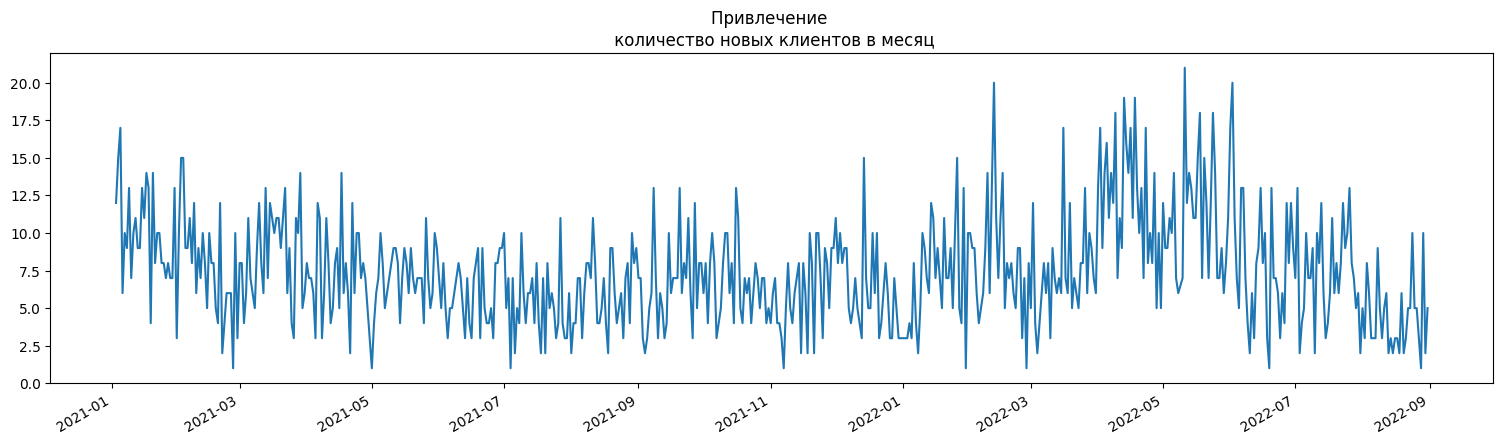

In [69]:
plt.figure(figsize=(15, 8)) 
ax1 = plt.subplot(2,1,1)
data.groupby('first_dt').agg({'insured':'nunique'}).plot(title = 'Привлечение \n количество новых клиентов в месяц', legend = False, ax=ax1);

plt.xlabel('')
plt.tight_layout()
plt.show()

Привлечение новых клиентов не превышает 20 человек в месяц, хотя новые клиенты очень положительно влияют на оборот.

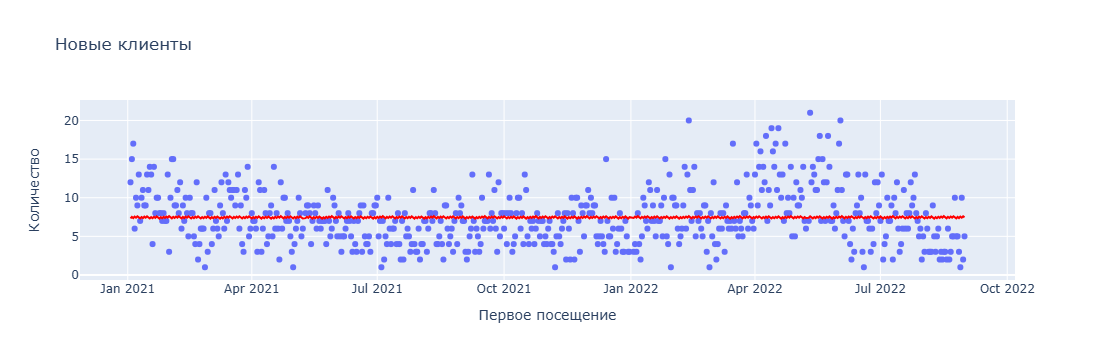

In [70]:
fdsdf=data.groupby('first_dt').agg({'insured':'nunique'}).reset_index()
fdsdf.columns=['Первое посещение', 'Количество']
px.scatter(fdsdf, x='Первое посещение', y='Количество', trendline="ols", trendline_color_override='red', title='Новые клиенты')

на графики наблюдаем постоянный рост количества привлечённых клиентов с пиками раз в месяц. Большой пик 12 февраля 22 г., 11 мая и 2 июня. Тред остаётся неизменным - по 7 клиентов в месяц в среднем

In [71]:
cohort=data.groupby('first_dt').agg({'insured':'nunique'}).reset_index()
once=data.query('first_dt == last_dt').groupby('first_dt').agg({'insured':'nunique'}).reset_index()
cohort = cohort.merge(once, on = 'first_dt')
cohort.columns = ('Дата', 'size', 'once')
cohort['Процент']=((cohort['once']*100)/cohort['size'])

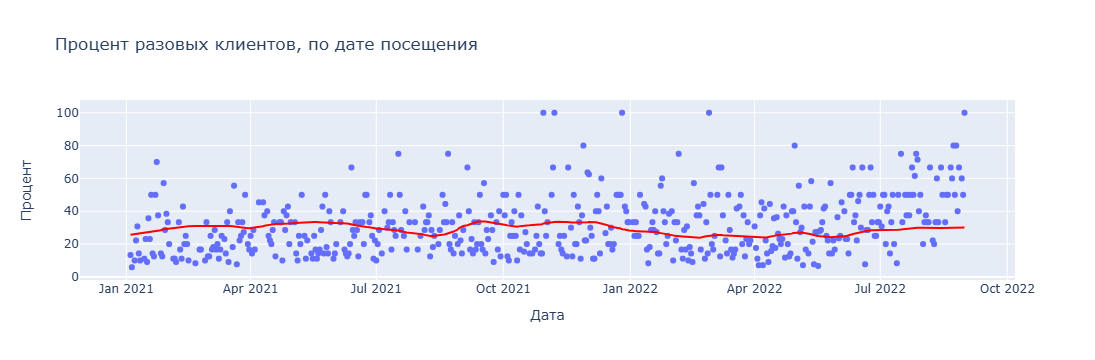

In [72]:
px.scatter(cohort, x="Дата", y="Процент", trendline="lowess", trendline_options=dict(frac=0.1), trendline_color_override='red',
          title='Процент разовых клиентов, по дате посещения')

Тренд на увеличение количества разовых клиентов не подтвердился. В среднем треть всех привлечённых клиентов не возращаются. Самый пик был в сентябре 2021 г. 

In [73]:
def get_retention(profiles, observation_date, horizon_days, dimensions = [], ignore_horizon=False):
    dimensions = ['payer'] + dimensions
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = data.query('service_date <= @last_suitable_acquisition_date')
    result_raw['lifetime'] = (result_raw['service_date'] - result_raw['first_dt']).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='insured', aggfunc='nunique')
        cohort_sizes = (
            df.groupby(dims)
            .agg({'insured': 'nunique'})
            .rename(columns={'insured': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    result_in_time = group_by_dimensions(result_raw, dimensions + ['first_dt'], horizon_days)

    return result_raw, result_grouped, result_in_time

retention_raw, retention, retention_history = get_retention(data, max_date.date(), 45,  dimensions=['sex_id'])

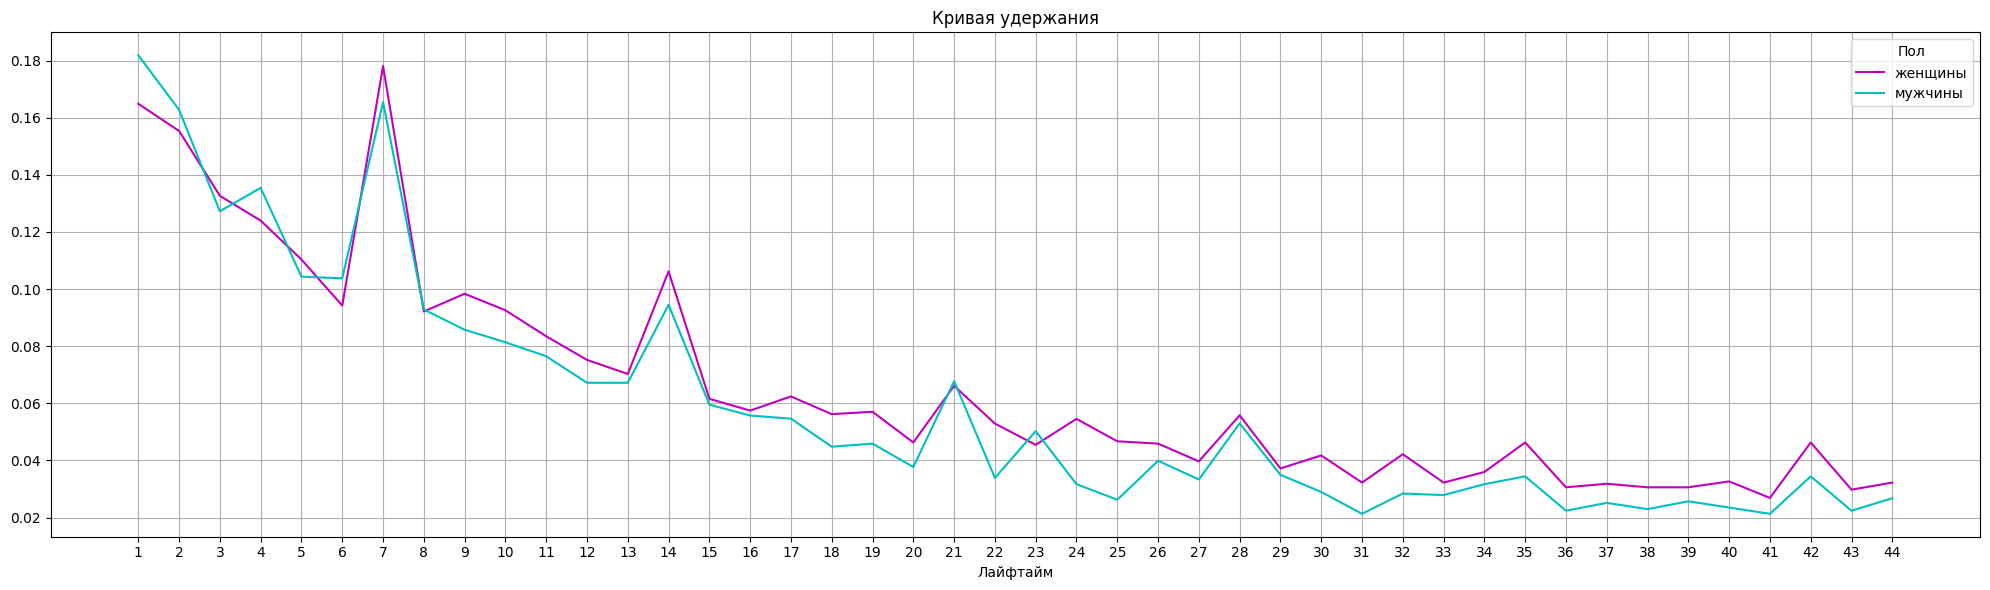

In [74]:
report = retention.drop(columns=['cohort_size', 0])

(report.droplevel('payer').T
        .plot(grid=True, xticks=list(report.columns.values), color = ['m','c'], figsize=(20, 6)).set_title('Кривая удержания'));

plt.xlabel('Лайфтайм')
#plt.title('Кривая удержания')
plt.legend(title = 'Пол')
plt.tight_layout()
plt.show()


Пики возрата клиентов каждую неделю: 7, 14, 21, 28 дни. Возможно врачи назначают повторный приём. Женщин мы видим больше, возможно они чаще посещают врачей.

In [75]:
date_insured = (data.groupby(['service_date','insured','sex_id'])
                .agg({'service_amount':'sum','age_group':'first', 'service_number':'sum', 'month':'first'})
                .reset_index())

In [76]:
di =date_insured.pivot_table(index='insured', columns= 'month', values= 'service_amount')

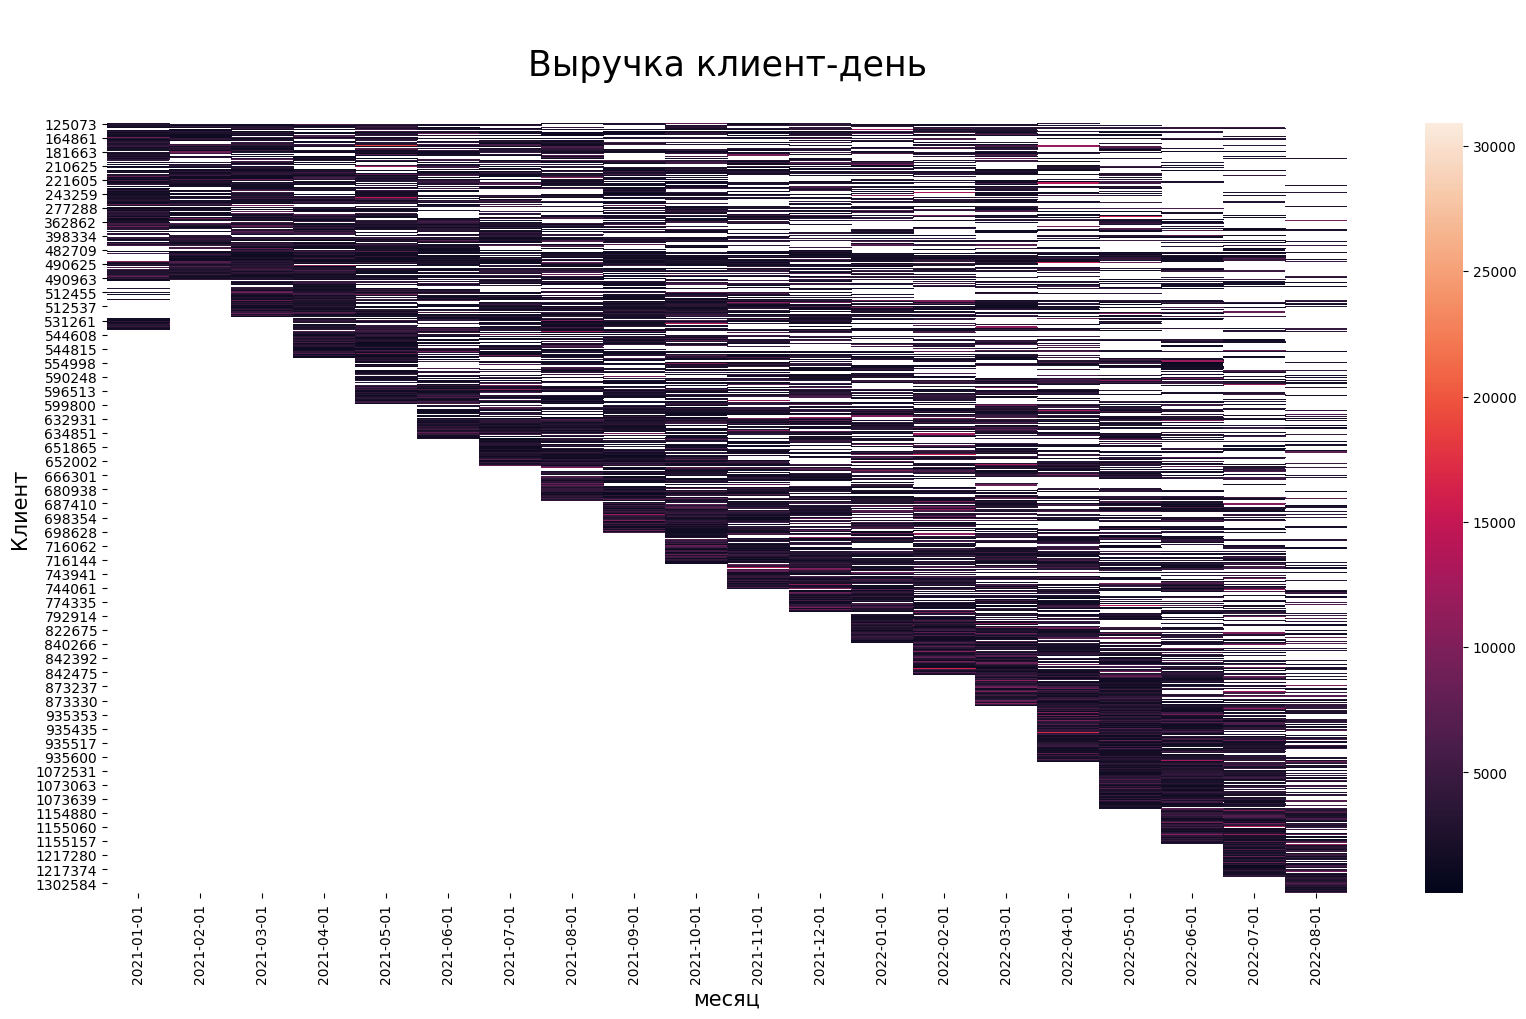

In [77]:
plt.figure(figsize=(20, 10))
sns.heatmap(di) 
plt.title('\nВыручка клиент-день\n', fontsize=25)
plt.xlabel('месяц', fontsize=15)
plt.ylabel('Клиент',fontsize=15)
plt.show()

Получается, что самые большие суммы приносят клиенты в течение первых 2-3 месяцев в связи с бОльшим количеством посещений, что говорит о том, что даже небольшое удержание не имеет большого значения по истечению месяца.

Ну и гипотеза №2 не подтвердилась и стала вообще не интересной.

### Пол

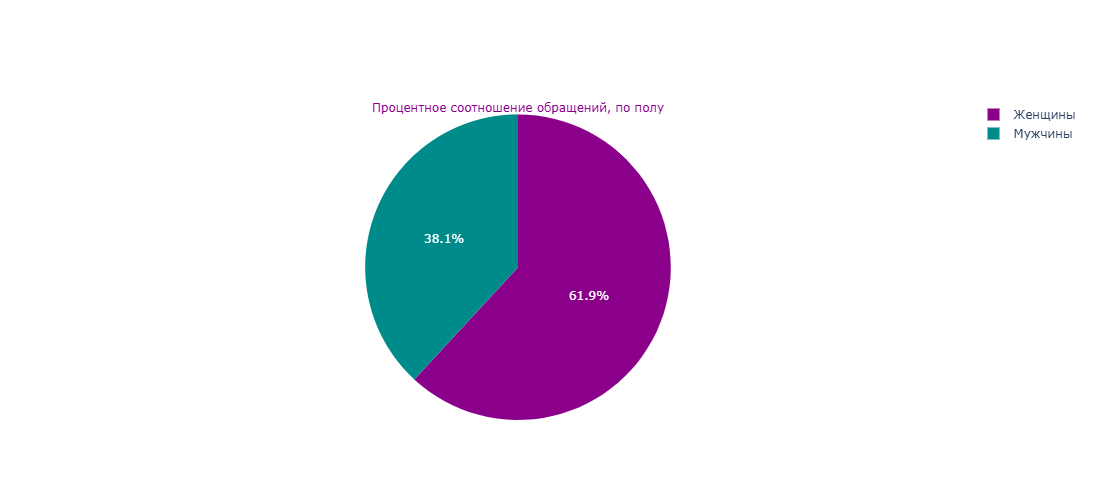

In [78]:
fig = go.Figure(data=[go.Pie(labels = ['Женщины', 'Мужчины'],
                values=data['sex_id'].value_counts(), 
                title = 'Процентное соотношение обращений, по полу',
                title_font_color='darkmagenta', marker = {'colors' : ['darkmagenta','darkcyan']})])

figsize=(15,10)
fig.update_layout(autosize=False, width=500, height=500)
fig.show() 

Среди обратившихся женщин в 1,5 раза больше

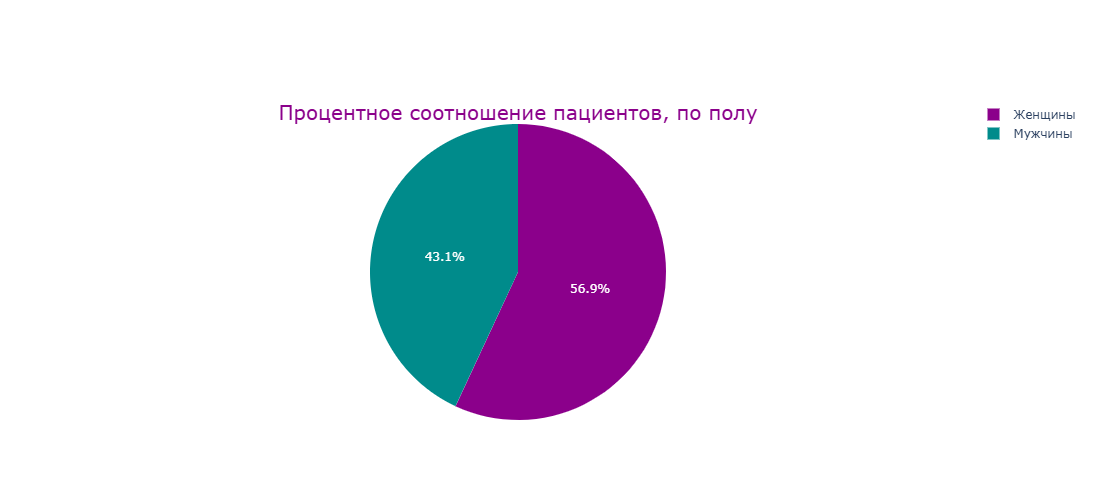

In [79]:
fig = go.Figure(data=[go.Pie(labels = ['Женщины', 'Мужчины'],
                values=data.groupby('sex_id')['insured'].agg('nunique'), 
                title = 'Процентное соотношение пациентов, по полу',
                title_font_size=20,
                title_font_color='darkmagenta',  marker = {'colors' : ['darkmagenta','darkcyan']})])
figsize=(15,10)
fig.update_layout(autosize=False, width=500, height=500)
fig.show() 

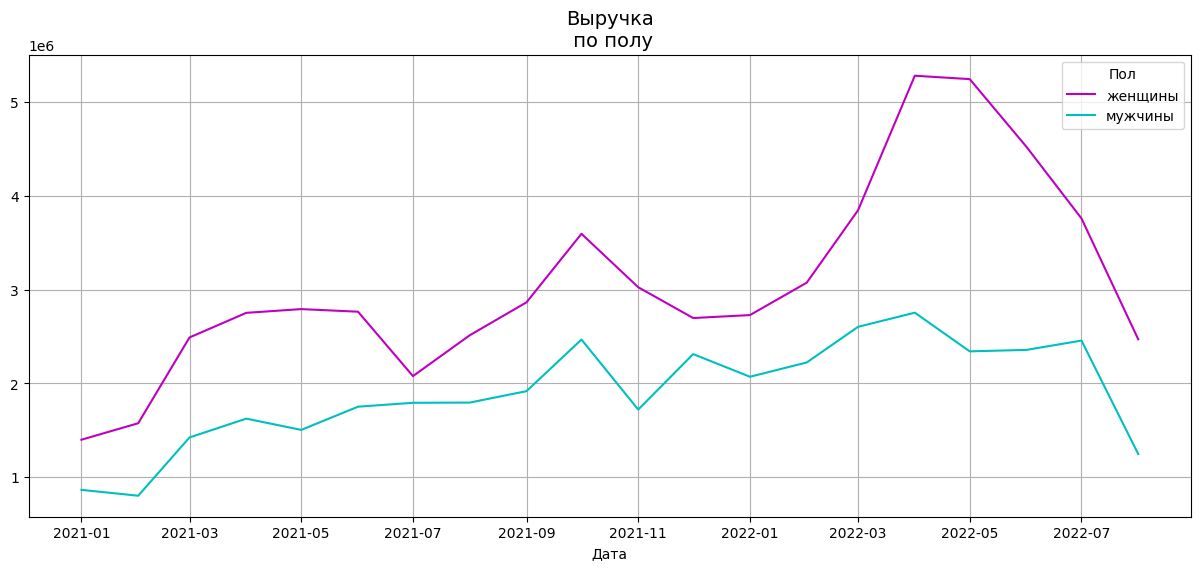

In [80]:
(data.pivot_table(index =  'month', columns = 'sex_id', values = 'service_amount', aggfunc = 'sum')
    .plot(figsize=(15,6), color = ['m','c'], grid=True).set_title('Выручка\n по полу', fontsize=14));
plt.xlabel('Дата')
plt.legend(title='Пол');

Обозначенная в пунке Услуги группа пациентов в основном состоит из женщин, количество пациентов-мужчин немного увеличилось.

In [81]:
sex_cnt = data.groupby('sex_id').agg({'record_id':'count', 'insured':'nunique'}).reset_index()
sex_cnt['ratio'] = round(sex_cnt['record_id']/sex_cnt['insured'])
sex_cnt.columns=['пол','кол-во обращений','количество застрахованных','соотношение']
sex_cnt

пол  кол-во обращений  количество застрахованных  соотношение
0  женщины             52802                       2555        21.00
1  мужчины             32540                       1932        17.00

Среди обратившихся - 61.9% женщин. А вот среди пациентов женщин только 56.9%. 

В среднем на женщину приходится 21 обращение за 1,5 года, на мужчину - 17. 

Женщины чаще обращаются, у них лучше удержание и они тратят больше денег.
Что подтвеждает гипотезу №3

### Возраст


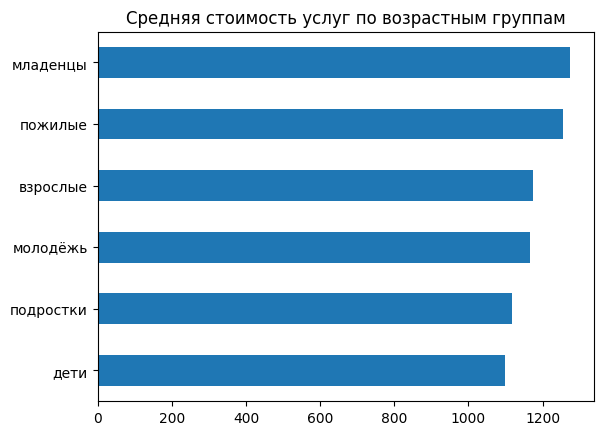

In [82]:
age = data.groupby('age_group')['service_amount'].agg(['sum', 'count', 'mean']).reset_index()
(age.sort_values(by='mean')
    .plot(kind='barh', x='age_group', y='mean', legend=False, xlabel='', title = 'Средняя стоимость услуг по возрастным группам'));


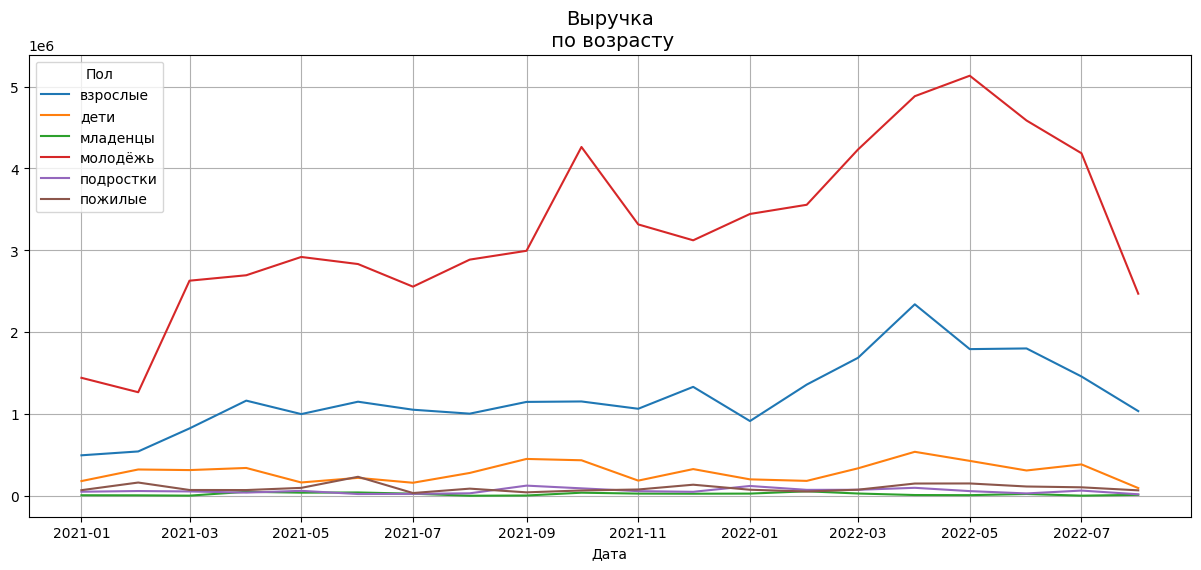

In [83]:
(data.pivot_table(index =  'month', columns = 'age_group', values = 'service_amount', aggfunc = 'sum')
    .plot(figsize=(15,6), grid=True).set_title('Выручка\n по возрасту', fontsize=14));
plt.xlabel('Дата')
plt.legend(title='Пол');

Наша передовая апрельская группа в основном состоящая из женщин имеет возрастную группу от 18 до 60. Пик в октябре 2021 сделала возрастная группа от 18 до 40.

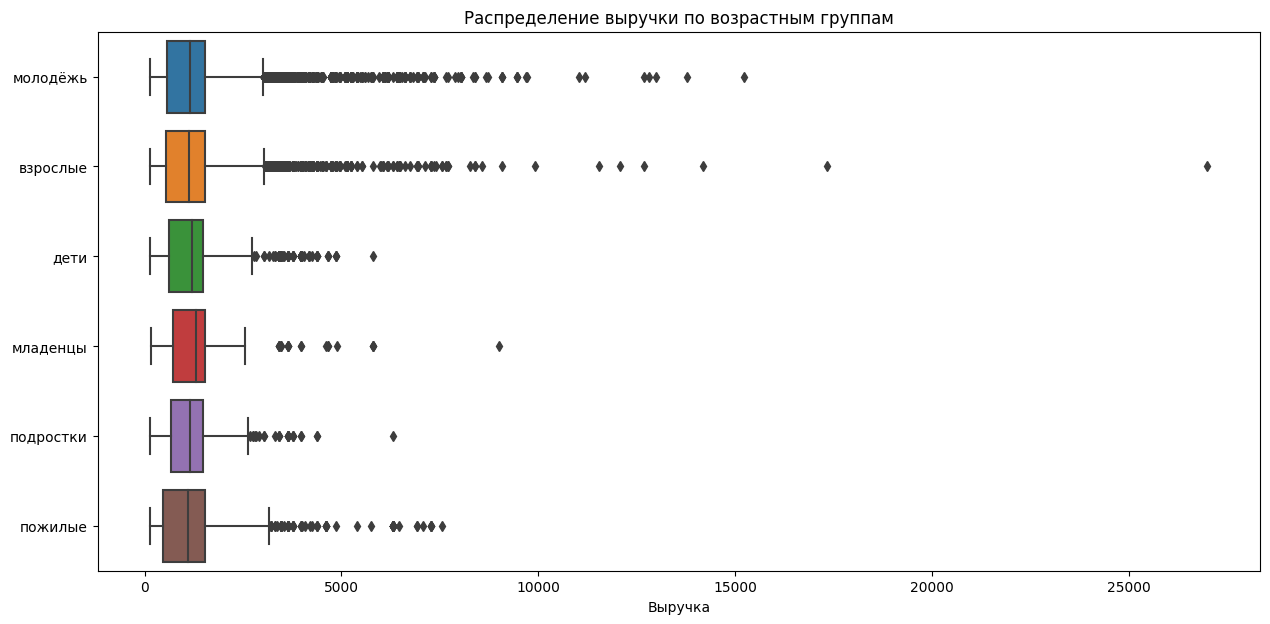

In [84]:
plt.figure(figsize=(15, 7))

sns.boxplot(data= data, x='service_amount', y='age_group').set_title('Распределение выручки по возрастным группам');

plt.ylabel('')
plt.xlabel('Выручка')
plt.show()


Cамые частные пациенты это люди среднего возрасти и они приносят самое большое количество денег, услуги дороже у младенцев и пожилых людей.

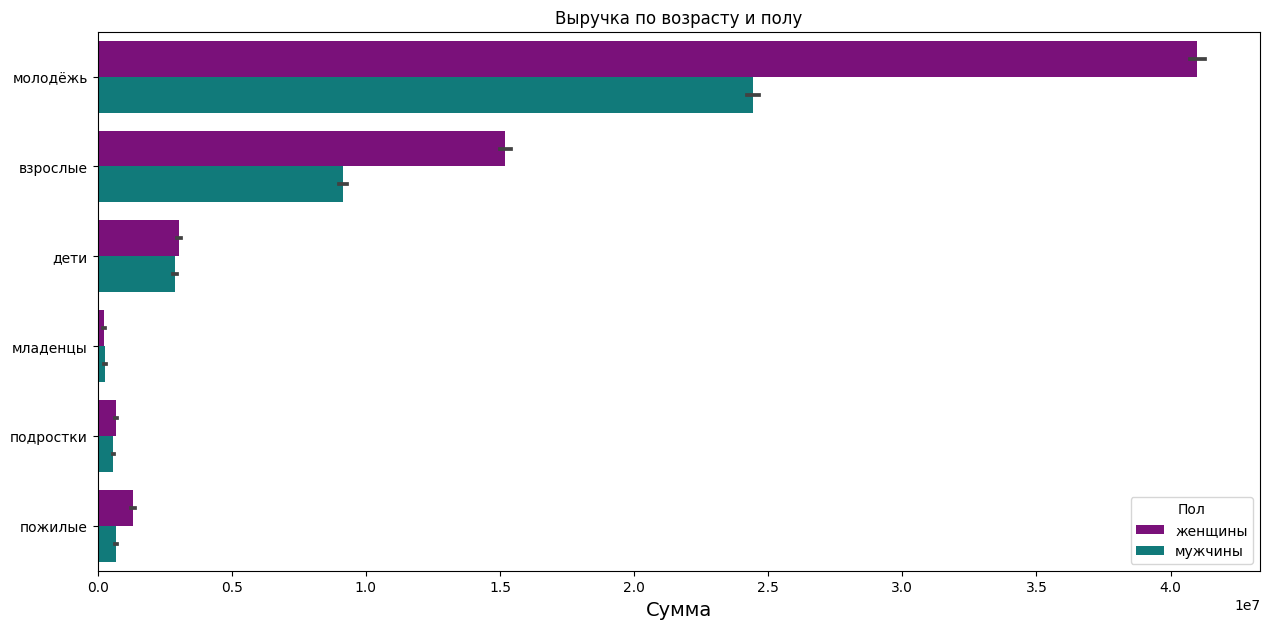

In [85]:
plt.figure(figsize=(15, 7))
#cols = ['darkcyan' if x == 'женщины' else 'darkmagenta' for x in data.sex_id]
cols=['darkmagenta', 'darkcyan']
sns.barplot(data=data, x='service_amount', y='age_group', hue='sex_id', estimator=sum,  palette=cols).set_title('Выручка по возрасту и полу')

plt.xlabel('Сумма', fontsize=14)
plt.ylabel('')
plt.legend(title='Пол')
plt.show()

Наибольший оборот делают молодые женщины (возрастная группа от 18 до 40), мужчины на втором месте. Гипотеза №3 - подтвердилась.

## Заключение

Вывод:
1. Выручка постоянно росла на протяжение всего исследуемого периода, благодаря следующим факторам:
   - увеличение количества услуг на одного обратившегося;
   - увеличение количества дорогих услуг (процедур);
   - увеличение количества обратившихся в месяц.
3. Драйверами продаж являются взрослые женщины в возрасте от 18 до 60 лет.
4. Весной 2022 года было большое количество "разовых" клиенток, которые сделали хороший оборот, надо звать ещё.
5. Удержание клиентов беспокойство не вызывает.
   